In [ ]:
!pip install pykeen pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import torch
from pykeen.triples import TriplesFactory
from pykeen.pipeline import pipeline
from pykeen.evaluation import RankBasedEvaluator
from pykeen import predict
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

INFO:pykeen.utils:Using opt_einsum


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
############################################
# 1. Определение устройства: GPU или CPU
############################################
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Используем устройство:", device)

Используем устройство: cuda


In [ ]:
############################################
# 2. Загрузка данных и создание TriplesFactory
############################################
df = pd.read_csv('drive/MyDrive/нирси/triples_dataset.csv')
print("Количество троек в датасете:", df.shape[0])

# Преобразуем DataFrame в массив троек
triples = df[['subject', 'predicate', 'object']].to_numpy()

# Создаём TriplesFactory (формируются entity_to_id и relation_to_id)
tf = TriplesFactory.from_labeled_triples(triples)
print("Количество уникальных сущностей:", len(tf.entity_to_id))
print("Количество уникальных отношений:", len(tf.relation_to_id))

Количество троек в датасете: 52260
Количество уникальных сущностей: 17916
Количество уникальных отношений: 3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52260 entries, 0 to 52259
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    52260 non-null  object
 1   predicate  52260 non-null  object
 2   object     52260 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [ ]:
############################################
# 3. 80% train, 10% validation, 10% test
############################################
train_tf, valid_tf, test_tf = tf.split([0.8, 0.1, 0.1], random_state=42)
print("Тройки в обучающем наборе:", train_tf.num_triples)
print("Тройки в валидационном наборе:", valid_tf.num_triples)
print("Тройки в тестовом наборе:", test_tf.num_triples)

INFO:pykeen.triples.splitting:done splitting triples to groups of sizes [21478, 4923, 4924]


Тройки в обучающем наборе: 39387
Тройки в валидационном наборе: 4923
Тройки в тестовом наборе: 4924


In [ ]:
############################################
# 4. Обучение модели TransE/ComplEx/RotatE
############################################
result = pipeline(
    training=train_tf,
    validation=valid_tf,
    testing=test_tf,
    model="RotatE",  # Выбираем модель TransE/ComplEx/RotatE
    model_kwargs=dict(embedding_dim=300),  # Размер эмбеддингов (аналог параметра k в AmpliGraph)
    training_kwargs=dict(num_epochs=100, batch_size=128),
    optimizer="adam",
    optimizer_kwargs=dict(lr=0.001),
    random_seed=42,
    device=device,
)

# Выводим агрегированные метрики из pipeline
print("Результаты pipeline (метрики):")
result.metric_results

INFO:pykeen.pipeline.api:Using device: cuda


Training epochs on cuda:0:   0%|          | 0/100 [00:00<?, ?epoch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Training batches on cuda:0:   0%|          | 0/308 [00:00<?, ?batch/s]

Evaluating on cuda:0:   0%|          | 0.00/4.92k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 5.66s seconds


Результаты pipeline (метрики):


In [ ]:
############################################
# 5. Оценка модели с использованием RankBasedEvaluator для модели TransE
############################################
evaluator = RankBasedEvaluator(filtered=True)
metrics_result = evaluator.evaluate(
    model=result.model,
    mapped_triples=test_tf.mapped_triples,
    additional_filter_triples=[train_tf.mapped_triples, valid_tf.mapped_triples],
)

print("Оценка модели RankBasedEvaluator:")
print("Mean Rank:", metrics_result.get_metric("mean_rank"))
print("Mean Reciprocal Rank (MRR):", metrics_result.get_metric("mean_reciprocal_rank"))
print("Hits@1:", metrics_result.get_metric("hits_at_1"))
print("Hits@10:", metrics_result.get_metric("hits_at_10"))

Evaluating on cuda:0:   0%|          | 0.00/4.92k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 3.70s seconds


Оценка модели RankBasedEvaluator:
Mean Rank: 2451.019775390625
Mean Reciprocal Rank (MRR): 0.12741313874721527
Hits@1: 0.0
Hits@10: 0.2643176279447604


In [ ]:
############################################
# 5. Оценка модели с использованием RankBasedEvaluator для модели RotatE
############################################
evaluator = RankBasedEvaluator(filtered=True)
metrics_result = evaluator.evaluate(
    model=result.model,
    mapped_triples=test_tf.mapped_triples,
    additional_filter_triples=[train_tf.mapped_triples, valid_tf.mapped_triples],
)

print("Оценка модели RankBasedEvaluator:")
print("Mean Rank:", metrics_result.get_metric("mean_rank"))
print("Mean Reciprocal Rank (MRR):", metrics_result.get_metric("mean_reciprocal_rank"))
print("Hits@1:", metrics_result.get_metric("hits_at_1"))
print("Hits@10:", metrics_result.get_metric("hits_at_10"))

Evaluating on cuda:0:   0%|          | 0.00/4.92k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 6.04s seconds


Оценка модели RankBasedEvaluator:
Mean Rank: 3496.177978515625
Mean Reciprocal Rank (MRR): 0.04801930859684944
Hits@1: 0.0299553208773355
Hits@10: 0.08214865962632006


In [ ]:
############################################
# 6. Triple Completion: Предсказание недостающего объекта
############################################
head = "Aptamers"
relation = "subclass_of"

tail_prediction_df = predict.predict_target(
    model=result.model,
    head=head,
    relation=relation,
    triples_factory=test_tf,
).df

print("Top-10 предсказаний для отсутствующего объекта в тройке:")
tail_prediction_df.head(10)

Top-10 предсказаний для отсутствующего объекта в тройке:


,tail_id,score,tail_label
14797,14797,-3.614516,Nucleic Acids
7549,7549,-5.274998,7sbd_H_L
10930,10930,-5.302952,8rz2_B_C
5047,5047,-5.319664,6udk_F_I
8154,8154,-5.320592,7uot_O_P
6310,6310,-5.321078,7kf0_H_L
5174,5174,-5.323507,6vl9_H_L
7461,7461,-5.326809,7rso_I_K
2592,2592,-5.328669,5do2_H_L
734,734,-5.330317,2ih3_A_B


In [ ]:
############################################
# 6. Triple Completion: Предсказание недостающего объекта
############################################
head = "Lysozyme"
relation = "interacts_with"

tail_prediction_df = predict.predict_target(
    model=result.model,
    head=head,
    relation=relation,
    triples_factory=test_tf,  # Для фильтрации уже известных фактов
).df

print("Top-10 предсказаний для отсутствующего объекта в тройке:")
tail_prediction_df.head(10)

Top-10 предсказаний для отсутствующего объекта в тройке:


,tail_id,score,tail_label
2982,2982,-4.516484,5mp3_A_B
1303,1303,-4.560313,3q1s_H_L
8908,8908,-4.566254,7yvp_K_H
2351,2351,-4.568645,4yga_D
4746,4746,-4.573473,6p3s_M_N
8385,8385,-4.579506,7wgd_H_L
1904,1904,-4.581575,4mhh_J_K
8840,8840,-4.583503,7yix_C_c
9721,9721,-4.593608,8eay_H_L
5047,5047,-4.599158,6udk_F_I


In [ ]:
############################################
# 7. Кластеризация
############################################

# Получаем эмбеддинги сущностей
entity_embeddings_tensor = result.model.entity_representations[0]()
entity_embeddings_tensor = entity_embeddings_tensor.detach().cpu()

print("Тип данных эмбеддингов:", entity_embeddings_tensor.dtype)
#print("Пример эмбеддинга:", entity_embeddings_tensor[0])

entity_embeddings_real = entity_embeddings_tensor.real.numpy()
entity_embeddings_imag = entity_embeddings_tensor.imag.numpy()

entity_embeddings_combined = np.concatenate([entity_embeddings_real, entity_embeddings_imag], axis=1)
print("Размерность после объединения:", entity_embeddings_combined.shape)

Тип данных эмбеддингов: torch.complex64
Размерность после объединения: (17916, 600)


In [ ]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=128)  # уменьшаем до 128
embeddings_svd = svd.fit_transform(entity_embeddings_combined)

print("Размерность после SVD:", embeddings_svd.shape)

Размерность после SVD: (17916, 128)


In [ ]:
pca = PCA(n_components=0.95)
embeddings_pca = pca.fit_transform(entity_embeddings_combined)

print("Размерность после PCA:", embeddings_pca.shape)

Размерность после PCA: (17916, 505)


In [ ]:
# Получаем отображение ID в Название сущности
id_to_entity = {v: k for k, v in train_tf.entity_to_id.items()}
entities = [id_to_entity[i] for i in range(len(id_to_entity))] # список ID сущностей

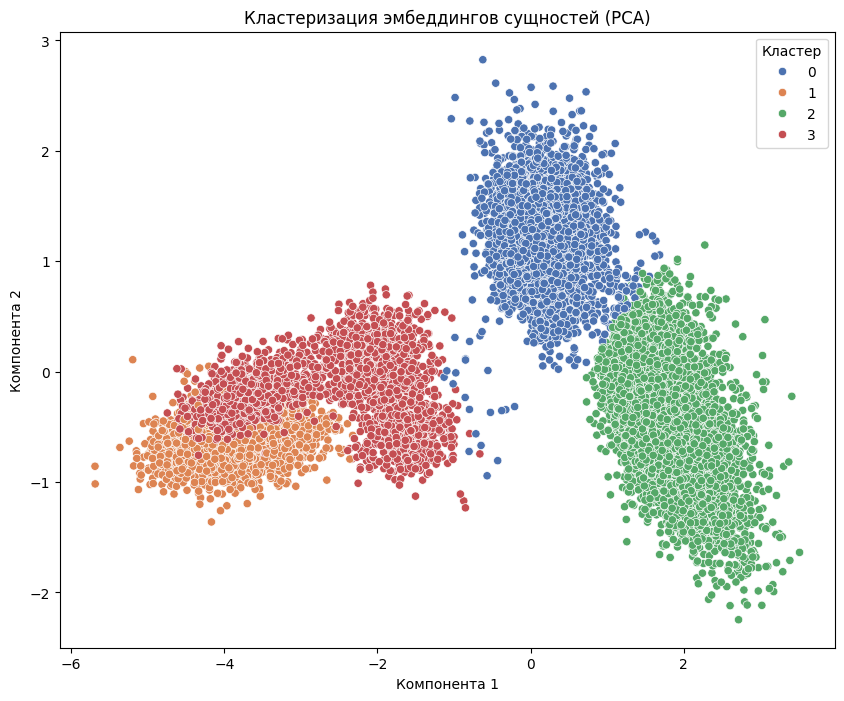

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embeddings_pca)

df_plot = pd.DataFrame({
    "entity": entities,
    "PC1": embeddings_pca[:, 0],
    "PC2": embeddings_pca[:, 1],
    "cluster": clusters
})


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="cluster", palette="deep")
plt.title("Кластеризация эмбеддингов сущностей (PCA)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend(title="Кластер")
plt.show()

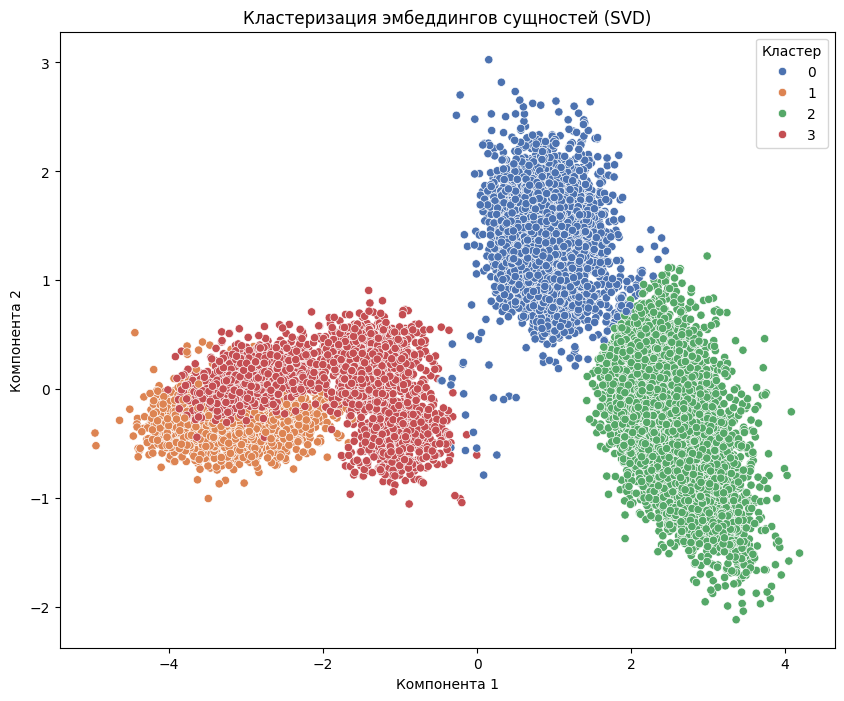

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(embeddings_pca)

df_plot = pd.DataFrame({
    "entity": entities,
    "PC1": embeddings_svd[:, 0],
    "PC2": embeddings_svd[:, 1],
    "cluster": clusters
})


plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="cluster", palette="deep")
plt.title("Кластеризация эмбеддингов сущностей (SVD)")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.legend(title="Кластер")
plt.show()

In [ ]:
############################################
# 8. Информация о результатах кластеризации
############################################
df_clusters = pd.DataFrame({
    "entity": entities,
    "cluster": clusters
})

# сколько объектов в каждом кластере
cluster_counts = df_clusters['cluster'].value_counts().sort_index()
print(f"Количество объектов в каждом кластере: {cluster_counts}")
print('========================')

# примеры из каждого кластера
print(" === Примеры сущностей в кластерах: === ")
for cluster_id in sorted(df_clusters['cluster'].unique()):
    cluster_entities = df_clusters[df_clusters['cluster'] == cluster_id]['entity']
    print(f"Кластер {cluster_id} (всего {len(cluster_entities)} сущностей):")
    print(cluster_entities.sample(min(10, len(cluster_entities))).tolist())  # случайные 10
    print('================================================================')

Количество объектов в каждом кластере: cluster
0    5210
1    2465
2    7997
3    2244
Name: count, dtype: int64
 === Примеры сущностей в кластерах: === 
Кластер 0 (всего 5210 сущностей):
['6ch7_D_E', '8jel_C_D', '5f7k_D', 'vp3', '5kaq_H_L', '6vca_E_F', '7tcn_C_D', '8cz8_D_d', 'licb protein', '2qr0_R_Q']
Кластер 1 (всего 2465 сущностей):
['APIPred_1168', 'PDBBind_1qd3', 'APIPred_1222', 'APIPred_1525', 'APIPred_2280', 'APIPred_2227', 'APIPred_1355', 'PDBBind_2f4u', 'APIPred_340', 'APIPred_482']
Кластер 2 (всего 7997 сущностей):
['7u9p_H_L', '7mlh_C_A', '6a96_K', '8t4l_P_R', '7wur_G_H', '7lcn_H_L', '7jgj_H_L', '7srk_B', '7wqv_J_j', '7jva_H_L']
Кластер 3 (всего 2244 сущностей):
['vqilnk', 'Methylquinoliniu m 23', 'aptamer_limited_ds_549', 'RSAPred_1846.0', 'RSAPred_217.0', 'aptamer_limited_ds_104', 'Compound 5', 'coiled-coil aph', 'e2 envelop protein', 'fab y49r light chain']


In [ ]:
#################################################
# 9. Сохранение обученной модели и ее мета-данных
#################################################

result.save_to_directory("drive/MyDrive/нирси/pykeen_model")
print("Модель и метаданные сохранены")

INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=17916, num_relations=3, create_inverse_triples=False, num_triples=39387) to file:///content/drive/MyDrive/%D0%BD%D0%B8%D1%80%D1%81%D0%B8/pykeen_model/training_triples
INFO:pykeen.pipeline.api:Saved to directory: /content/drive/MyDrive/нирси/pykeen_model


Модель и метаданные сохранены


In [ ]:
#################################################
# 10. Описательная статистика собранного триплетного графа
#################################################

# Метрики
num_entities = len(set(df["subject"]).union(set(df["object"])))
num_relations = len(df)
num_unique_relations = df["predicate"].nunique()

# Вычисление количества классов и подклассов
num_classes = len(df[df["predicate"] == "class_of"]["object"].unique())  # Количество уникальных классов
num_subclasses = len(df[df["predicate"] == "subclass_of"]["object"].unique())  # Количество подклассов

# Вывод результатов
print(f"Число сущностей (узлов): {num_entities}")
print(f"Число связей (рёбер): {num_relations}")
print(f"Число уникальных типов связей: {num_unique_relations}")
print(f"Число классов: {num_classes}")
print(f"Число подклассов: {num_subclasses}")

Число сущностей (узлов): 17916
Число связей (рёбер): 52260
Число уникальных типов связей: 3
Число классов: 7
Число подклассов: 3


In [ ]:
df['predicate'].value_counts() # сколько сущностей на каждый вид связи

,count
predicate,
class_of,20148
interacts_with,16230
subclass_of,15882


In [ ]:
# Вычисляем количество связей для каждой сущности
from collections import Counter

# Количество входящих и исходящих связей для каждой сущности
entity_degrees = Counter(df["subject"]) + Counter(df["object"])

# Среднее количество связей на одну сущность
avg_degree = np.mean(list(entity_degrees.values()))

# Самая связанная сущность
most_connected_entity = max(entity_degrees, key=entity_degrees.get)
max_degree = entity_degrees[most_connected_entity]

# Вывод результатов
print(f"Среднее количество связей на одну сущность: {avg_degree:.2f}")
print(f"Самая связанная сущность: {most_connected_entity} (связей: {max_degree})")

Среднее количество связей на одну сущность: 5.83
Самая связанная сущность: protein (связей: 14724)
